In [2]:
from skimage.io import imshow
from skimage import data
coins = data.coins()

C:\ProgramData\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
#Сегментация через фильтр Кэнни

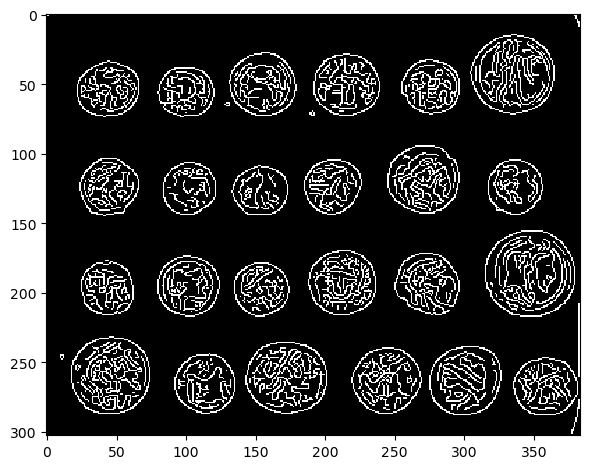

In [3]:
from skimage.feature import canny
edges = canny(coins/255.)
imshow(edges)

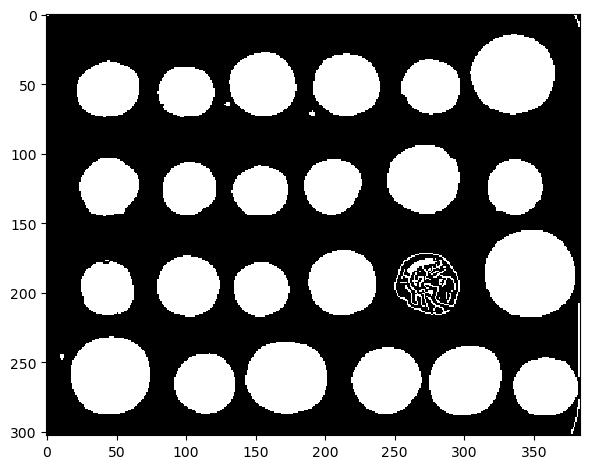

In [4]:

from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)
imshow(fill_coins)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 113
[76267     1     4     7  2705  1746  1706  1305  1432  1167    10    12
  2026  1378  1291  1253  1165  1145  3254  1830    10     3     4  1553
    17     2    11   113     1     3    14  1192  1223     4     7     5
     2     3     2     7     1     7     1     1     5    12     2     1
     2    13    12    17     2    15     5     3     1     8     7     8
     5     8    17     5     9     1     2     6     2     2    14     1
     3     5    11     2     7    17     5    10     1     1     2    15
    31     1     3     5     5     1     3     3    53     3     5     2
     2     2    10     2     4     7     2  2562  2450  2098  1849  1499
    10  1559    14     4     3     6]
[ True False False False  True  True  True  True  True  True False False
  True  True  True  True  True  True  True  True False False False  True
 False False False  True False Fals

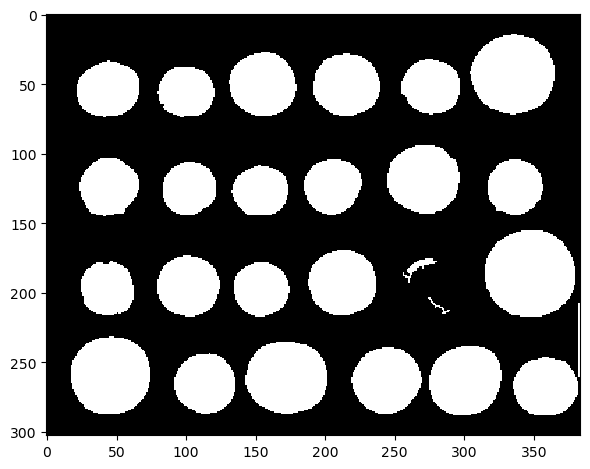

In [5]:
import numpy as np
label_objects, nb_labels = ndi.label(fill_coins)
print(label_objects, nb_labels)
sizes = np.bincount(label_objects.ravel())
print(sizes)
mask_sizes = sizes > 20
print(mask_sizes)
mask_sizes[0] = 0
mask_sizes[1] = 0
print(mask_sizes)
coins_cleaned = mask_sizes[label_objects]
print(coins_cleaned)
imshow(coins_cleaned)

In [9]:
#Следовательно, этот метод сегментации не очень надежен: если мы пропустим один пиксель контура объекта, мы не сможем его заполнить.

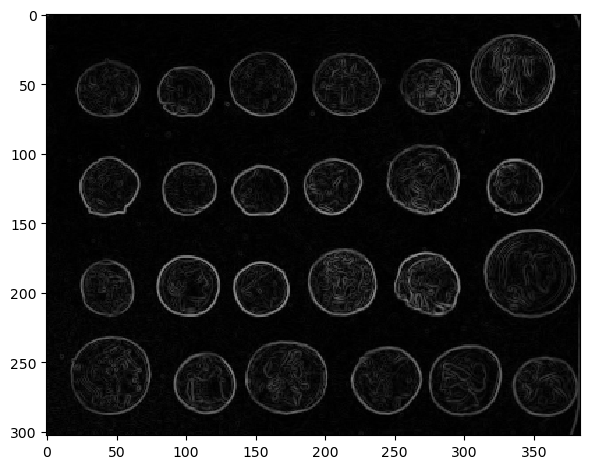

In [7]:
#Сегментация через фильтр Собеля
from skimage.filters import sobel
elevation_map = sobel(coins)
imshow(elevation_map)

C:\ProgramData\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


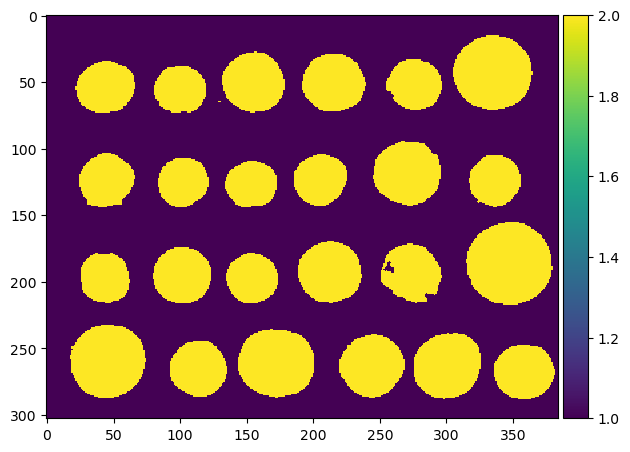

In [8]:
#Применение водораздельных бассейнов для выделения по контуру фигур на картинке
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
from skimage.segmentation import watershed
segmentation = watershed(elevation_map, markers)
imshow(segmentation)